10) Questão: Como foi a produção de animais ano a ano e mês a mês por linhagem ?


Hipótese: existe uma variação anual ou mensal entre o nascimento dos animais criados no biotério de acordo com linhagens isogênicas. E uma produção mais linear entre a linhagem heterogênica.


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# plt.rcParams.update({'font.size': 20})
# plt.rcParams['xtick.labelsize'] = 20
# plt.rcParams['ytick.labelsize'] = 20

In [2]:
eel = pd.read_csv('../tabelas_test/est_est_log_2019-06-18.csv', index_col='id')
eel.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
1,1408122540,Giovanny,Swiss A,3,m,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA
2,1408122540,Giovanny,Swiss A,2,f,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA
3,1408122540,Giovanny,Swiss B,3,m,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA
4,1408122540,Giovanny,Swiss B,3,f,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA
5,1408122540,Giovanny,Swiss B,4,f,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA


In [3]:
#Filtrando coluna com as condições

num_nasc = eel[(eel['util'] == 'nasc') & (eel['num_nasc'] < 200)]

#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++=

#lista com nome das colunas referentes a datas
datas = ['date_hoje', 
         'date_nasc', 
         'data_inicio', 
         'date_acas', 
         'date_nasc_acas', 
         'date_sex', 
         'data_solic', 
         'data_forn', 
         'data_fim']

#laço que em c percorre em datas e padronizando tudo em formato de data pela função to_datetime
for c in datas:
    num_nasc[c] = pd.to_datetime(num_nasc[c], unit = 's') #indica o formato das datas
    
num_nasc.head()

/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
116,2014-09-23 17:40:33,Tania,Swiss E,5,AAA,1970-01-01 00:11:06,54,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:33,5,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
117,2014-09-23 17:40:33,Tania,Swiss E,10,AAA,1970-01-01 00:11:06,56,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:33,10,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
118,2014-09-23 17:40:33,Tania,Swiss C,20,AAA,1970-01-01 00:11:06,62,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:46:07,2014-09-23 17:40:33,20,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
119,2014-09-23 17:40:47,Tania,Swiss E,10,AAA,1970-01-01 00:11:06,116,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:47,10,2014-10-14 17:40:47,666,666,666,666,AAA,AAA
120,2014-09-23 17:40:47,Tania,Swiss E,20,AAA,1970-01-01 00:11:06,117,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:47,20,2014-10-14 17:40:47,666,666,666,666,AAA,AAA


In [4]:
#Filtrando linhagens a não serem utilizadas
ling_ex = [
    'Test',
    'AAA',
    'Swiss',
    'C57BL06WT\t',
    'Swiss/CFW B',
    'Swiss/CFW D',
    'Swiss/CFW A',
    'Swiss/CFW C',
    'Swiss/CFW',
    'Swiss-2',
    'Swiss-2 A ',
    'NZB/BINJ',
    'NZW/LacJ',
    'NOD / SHILTJ'
]

tirar_ling = num_nasc[
    (num_nasc['ling'] != ling_ex[0]) &
    (num_nasc['ling'] != ling_ex[1]) &
    (num_nasc['ling'] != ling_ex[2]) &
    (num_nasc['ling'] != ling_ex[3]) &
    (num_nasc['ling'] != ling_ex[4]) &
    (num_nasc['ling'] != ling_ex[5]) &
    (num_nasc['ling'] != ling_ex[6]) &
    (num_nasc['ling'] != ling_ex[7]) &
    (num_nasc['ling'] != ling_ex[8]) &
    (num_nasc['ling'] != ling_ex[9]) &
    (num_nasc['ling'] != ling_ex[10]) &
    (num_nasc['ling'] != ling_ex[11]) &
    (num_nasc['ling'] != ling_ex[12]) &
    (num_nasc['ling'] != ling_ex[13])
]
len(tirar_ling)

1785

In [5]:
ling_ex = [
    'Test',
    'AAA',
    'Swiss',
    'C57BL06WT\t',
    'Swiss/CFW B',
    'Swiss/CFW D',
    'Swiss/CFW A',
    'Swiss/CFW C',
    'Swiss/CFW',
    'Swiss-2',
    'Swiss-2 A ',
    'NZB/BINJ',
    'NZW/LacJ',
    'NOD / SHILTJ'
]

#Fiz uma condição para que as linhagens da lista acima fosse filtradas e descartadas da análise

if all(num_nasc['ling'] != tuple(ling_ex)): #função all(iterável)`Retorna `True` se todos os elementos do iterável forem verdadeiros (ou se o iterável for vazio).
    #Transformei a lista numa tupla pq o tamanho como lista estava interferindo, resultando em erro
    print ('deu') #caso fosse TRUE
else:
    print('nao deu')

deu


In [6]:
#num_nasc[num_nasc['num_sex_f'] < 200].head()


In [7]:
#pq depois de filtrar ainda aparece o 666 na minha dataframe???????????? :C

serie_temp_ling = pd.DataFrame(tirar_ling['date_hoje'])
serie_temp_ling['date_sex'] = tirar_ling['date_sex']
serie_temp_ling['ling'] = tirar_ling['ling']#criação da DataFrame "tirar_ling com a coluna de data"
serie_temp_ling['num_nasc'] = tirar_ling['num_nasc']#criação de coluna(serie_temp) que estará inserida na DataFrame
serie_temp_ling = serie_temp_ling.set_index('date_hoje') #identificando a nova coluna como index data_hoje
serie_temp_ling.head()

,date_sex,ling,num_nasc
date_hoje,,,
2014-09-23 17:40:33,2014-10-14 17:40:33,Swiss E,5
2014-09-23 17:40:33,2014-10-14 17:40:33,Swiss E,10
2014-09-23 17:40:33,2014-10-14 17:40:33,Swiss C,20
2014-09-23 17:40:47,2014-10-14 17:40:47,Swiss E,10
2014-09-23 17:40:47,2014-10-14 17:40:47,Swiss E,20


In [8]:
tsAno = serie_temp_ling.resample('A').sum() 
tsAno

,num_nasc
date_hoje,
2014-12-31,599
2015-12-31,1629
2016-12-31,2662
2017-12-31,2607
2018-12-31,4562
2019-12-31,2828


In [9]:
num_nasc.loc[num_nasc.index.min(), 'date_hoje']


Timestamp('2014-09-23 17:40:33')

In [10]:
serie_temp_ling[serie_temp_ling['ling'] == 'Balb/c']
serie_temp_ling.head()

,date_sex,ling,num_nasc
date_hoje,,,
2014-09-23 17:40:33,2014-10-14 17:40:33,Swiss E,5
2014-09-23 17:40:33,2014-10-14 17:40:33,Swiss E,10
2014-09-23 17:40:33,2014-10-14 17:40:33,Swiss C,20
2014-09-23 17:40:47,2014-10-14 17:40:47,Swiss E,10
2014-09-23 17:40:47,2014-10-14 17:40:47,Swiss E,20


Gráfico filtrando por linhagem ano a ano

Text(0, 0.5, 'Soma de animais')

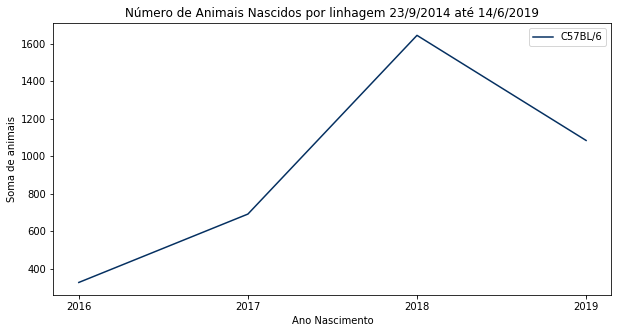

In [11]:
inic = num_nasc.loc[num_nasc.index.min(), 'date_hoje'] #loc: localizador - localizando a primeira data
fim = num_nasc.loc[num_nasc.index.max(), 'date_hoje']

tsAno = serie_temp_ling[serie_temp_ling['ling'] == 'C57BL/6']['num_nasc'].resample('A').sum() #resample('A') agrupamento por ano, sum() somando os dados
#tsAno = serie_temp_ling[serie_temp_ling['ling'] == 'C57BL/6']['num_nasc'].resample('A').sum()
tsAno.plot(
    figsize=(10, 5),
        colormap='RdBu_r',
        title=f'Número de Animais Nascidos por linhagem {inic.day}/{inic.month}/{inic.year} até {fim.day}/{fim.month}/{fim.year}'
)
plt.legend(['C57BL/6'])
# plt.legend(['Balb/c'])
plt.xlabel('Ano Nascimento')
plt.ylabel('Soma de animais')

#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



Gráfico plotando todas as linhagens isogênicas ano a ano

Text(0, 0.5, 'Soma de animais')

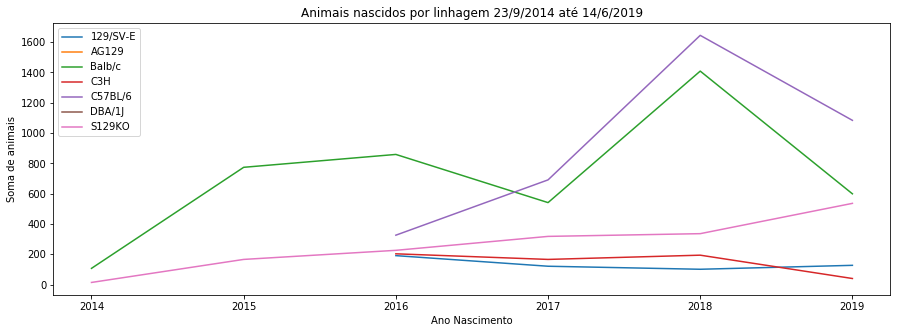

In [12]:
#Linhagens isogênicas
'''
'129/SV-E', 'AG129', 'Balb/c', 'C3H', 'C57BL/6','DBA/1J', 'S129KO'
'''
plot_ling = ['129/SV-E', 'AG129', 'Balb/c', 'C3H', 'C57BL/6','DBA/1J', 'S129KO']
             
serie_temp_ling[serie_temp_ling['ling'] == '129/SV-E']['num_nasc'].resample('A').sum().plot()

serie_temp_ling[serie_temp_ling['ling'] == 'AG129']['num_nasc'].resample('A').sum().plot()

serie_temp_ling[serie_temp_ling['ling'] == 'Balb/c']['num_nasc'].resample('A').sum().plot()

serie_temp_ling[serie_temp_ling['ling'] == 'C3H']['num_nasc'].resample('A').sum().plot()

serie_temp_ling[serie_temp_ling['ling'] == 'C57BL/6']['num_nasc'].resample('A').sum().plot()

serie_temp_ling[serie_temp_ling['ling'] == 'DBA/1J']['num_nasc'].resample('A').sum().plot()

serie_temp_ling[serie_temp_ling['ling'] == 'S129KO']['num_nasc'].resample('A').sum().plot(
    figsize=(15, 5),
        title=f'Animais nascidos por linhagem {inic.day}/{inic.month}/{inic.year} até {fim.day}/{fim.month}/{fim.year}'
)
plt.legend(plot_ling)
plt.xlabel('Ano Nascimento')
plt.ylabel('Soma de animais')


Gráfico plotando todas as linhagens isogênicas ano a ano (com laço)

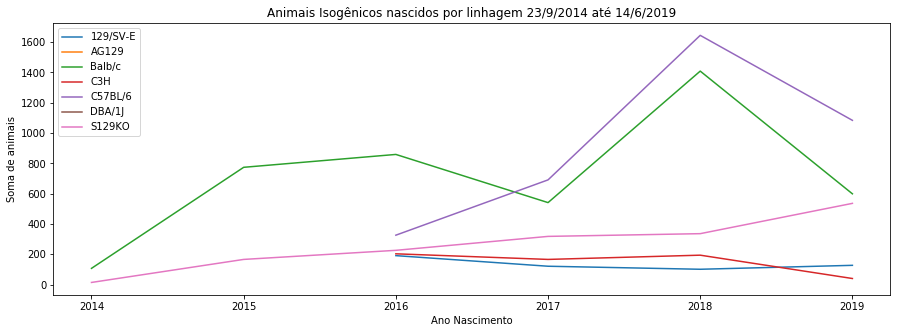

In [23]:
#Linhagens isogênicas
'''
'129/SV-E', 'AG129', 'Balb/c', 'C3H', 'C57BL/6','DBA/1J', 'S129KO'
'''
plot_ling = ['129/SV-E', 'AG129', 'Balb/c', 'C3H', 'C57BL/6','DBA/1J', 'S129KO']

plt.figure(figsize=(15, 5))
for l in plot_ling:
    serie_temp_ling[serie_temp_ling['ling'] == l]['num_nasc'].resample('A').sum().plot()
plt.title(f'Animais Isogênicos nascidos por linhagem {inic.day}/{inic.month}/{inic.year} até {fim.day}/{fim.month}/{fim.year}')
plt.legend(plot_ling)
plt.xlabel('Ano Nascimento')
plt.ylabel('Soma de animais')
plt.savefig(
    fname="../resultados/10_pergunta_iso_linha_anoaano.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

Gráfico plotando todas filtrando as linhagens mês a mês

Text(0, 0.5, 'Soma Nascidos')

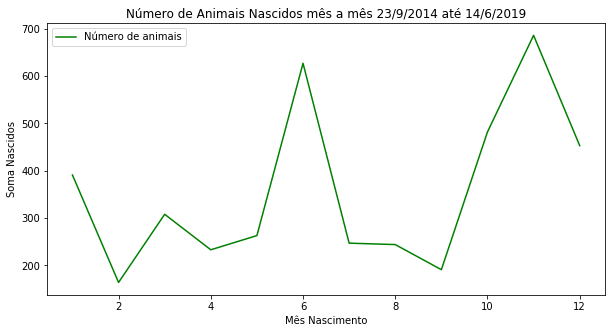

In [14]:
tsMes = serie_temp_ling[serie_temp_ling['ling'] == 'Balb/c' ]['num_nasc'].groupby([lambda x: x.month]).sum()

tsMes.plot(
        figsize=(10, 5),
        colormap='ocean',
        title=f'Número de Animais Nascidos mês a mês {inic.day}/{inic.month}/{inic.year} até {fim.day}/{fim.month}/{fim.year}'
)
plt.legend(['Número de animais']) #legenda
plt.xlabel('Mês Nascimento') #identificação eixo x
plt.ylabel('Soma Nascidos')

Gráfico plotando todas as linhagens mês a mês

Text(0, 0.5, 'Soma de animais')

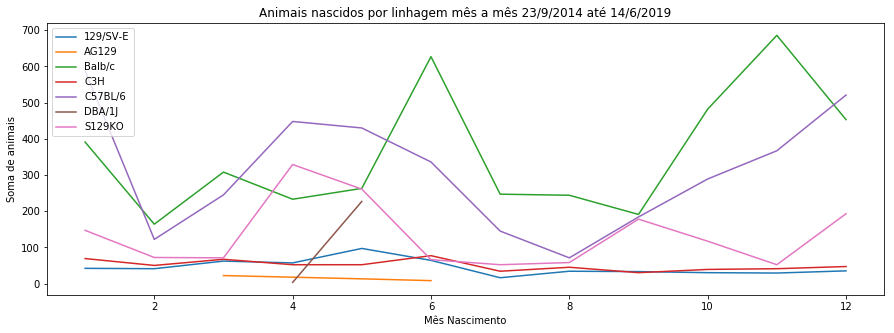

In [15]:
plot_ling = ['129/SV-E', 'AG129', 'Balb/c', 'C3H', 'C57BL/6','DBA/1J', 'S129KO']
             
serie_temp_ling[serie_temp_ling['ling'] == '129/SV-E' ]['num_nasc'].groupby([lambda x: x.month]).sum().plot()

serie_temp_ling[serie_temp_ling['ling'] == 'AG129' ]['num_nasc'].groupby([lambda x: x.month]).sum().plot()

serie_temp_ling[serie_temp_ling['ling'] == 'Balb/c' ]['num_nasc'].groupby([lambda x: x.month]).sum().plot()

serie_temp_ling[serie_temp_ling['ling'] == 'C3H' ]['num_nasc'].groupby([lambda x: x.month]).sum().plot()

serie_temp_ling[serie_temp_ling['ling'] == 'C57BL/6' ]['num_nasc'].groupby([lambda x: x.month]).sum().plot()

serie_temp_ling[serie_temp_ling['ling'] == 'DBA/1J' ]['num_nasc'].groupby([lambda x: x.month]).sum().plot()

serie_temp_ling[serie_temp_ling['ling'] == 'S129KO' ]['num_nasc'].groupby([lambda x: x.month]).sum().plot(
    figsize=(15, 5),
        title=f'Animais nascidos por linhagem mês a mês {inic.day}/{inic.month}/{inic.year} até {fim.day}/{fim.month}/{fim.year}'
)
plt.legend(plot_ling)
plt.xlabel('Mês Nascimento')
plt.ylabel('Soma de animais')

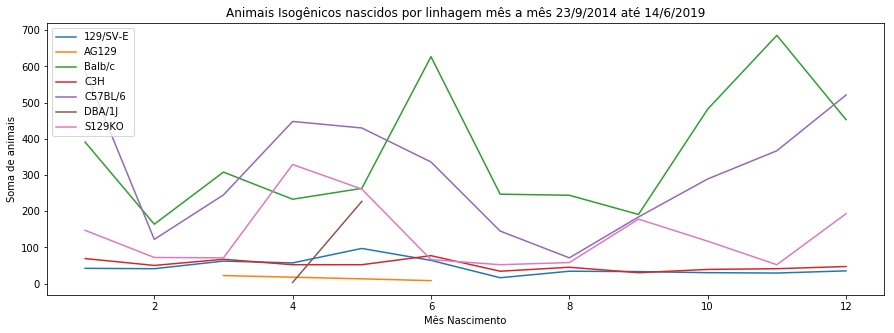

In [24]:
plot_ling = ['129/SV-E', 'AG129', 'Balb/c', 'C3H', 'C57BL/6','DBA/1J', 'S129KO']

plt.figure(figsize=(15, 5))
for c in plot_ling:
    serie_temp_ling[serie_temp_ling['ling'] == c]['num_nasc'].groupby([lambda x: x.month]).sum().plot()
    
plt.title(f'Animais Isogênicos nascidos por linhagem mês a mês {inic.day}/{inic.month}/{inic.year} até {fim.day}/{fim.month}/{fim.year}')
plt.legend(plot_ling)
plt.xlabel('Mês Nascimento')
plt.ylabel('Soma de animais')
plt.savefig(
    fname="../resultados/10_pergunta_iso_linha_mesames.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

Gráfico plotando linhagens Heterogênicas ano a ano

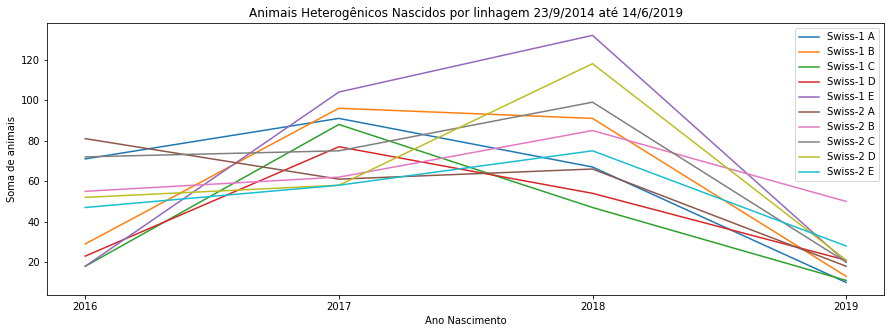

In [25]:
#Linhagens heterogênicas

plot_ling = 'Swiss-1 A;Swiss-1 B;Swiss-1 C;Swiss-1 D;Swiss-1 E;Swiss-2 A;Swiss-2 B;Swiss-2 C;Swiss-2 D;Swiss-2 E'.split(';') #split serve para montar uma lista

plt.figure(figsize=(15, 5))
for l in plot_ling:
    serie_temp_ling[serie_temp_ling['ling'] == l]['num_nasc'].resample('A').sum().plot()
plt.title(f'Animais Heterogênicos Nascidos por linhagem {inic.day}/{inic.month}/{inic.year} até {fim.day}/{fim.month}/{fim.year}')
plt.legend(plot_ling)
plt.xlabel('Ano Nascimento')
plt.ylabel('Soma de animais')
plt.savefig(
    fname="../resultados/10_pergunta_het_linha_anoaano.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

Gráfico plotando linhagens Heterogênicas mês a mês

No handles with labels found to put in legend.


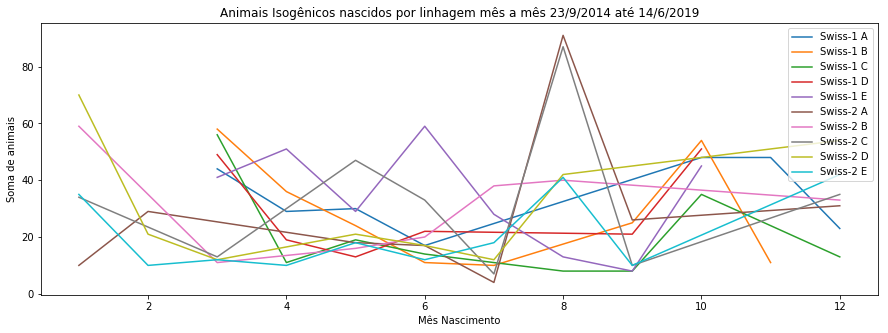

In [26]:
#linhagens heterogênicas
plot_ling = 'Swiss-1 A;Swiss-1 B;Swiss-1 C;Swiss-1 D;Swiss-1 E;Swiss-2 A;Swiss-2 B;Swiss-2 C;Swiss-2 D;Swiss-2 E'.split(';') #split serve para montar uma lista

plt.figure(figsize=(15, 5))
plt.legend(loc = 'best')
for c in plot_ling:
    serie_temp_ling[serie_temp_ling['ling'] == c]['num_nasc'].groupby([lambda x: x.month]).sum().plot()
    
plt.title(f'Animais Isogênicos nascidos por linhagem mês a mês {inic.day}/{inic.month}/{inic.year} até {fim.day}/{fim.month}/{fim.year}')
plt.legend(plot_ling, loc = 'upper right')
plt.xlabel('Mês Nascimento')
plt.ylabel('Soma de animais')
plt.savefig(
    fname="../resultados/10_pergunta_het_linha_mesames.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)


Resultado: 
O resultado concorda com a hipótese, ao traçar o gráfico entre os períodos de 2014 a 2019, existe uma diferença de produção de animal por linhagens. Algumas das linhagens possuem uma produção maior devido a pedidos realizados por pesquisadores, sendo as linhagens isogênicas Balb/c e C57BL/6 as mais produzidas. 
Balb/c possue uma produção maior em 2018, e maior numero de pedidos no mês de Novembro e Junho.
C57BL/6 também com uma produção maior em 2018, e maior numero de pediso em Dezembro e Janeiro. Apresentando uma tendência mais clara entre esses períodos.

O grupo heterogêncio apresenta-se uma produção linear, em que todos os grupos se dispõe numa mesma proporção de produção, concordando com a hipótese de que a produção desse grupo é produzido numa mesma quantidade, apresentando um aumento no ano de 2018. Sendo Swiss-1 A e Swiss-2 C com maior produção no mês de agosto.





Desdobramento: 